In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import sys
sys.path.append("../")
from src import soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_scaling as s_scaling
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

pd.set_option('display.max_columns', None)


ModuleNotFoundError: No module named 'src'

In [ ]:
df = pd.read_pickle("../datos_dfs\pickle1_nonulos.pkl") 

In [ ]:
df

,JobInvolvement,PerformanceRating,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,EnvironmentSatisfaction_iterative,JobSatisfaction_iterative,WorkLifeBalance_iterative,NumCompaniesWorked_iterative,TotalWorkingYears_iterative
0,3,3,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,1573.92,0,6,0,3,4,2,1,1
1,2,4,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,502.68,1,3,4,3,2,4,0,6
2,3,3,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,2319.36,3,2,3,2,2,1,1,5
3,2,3,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,998.52,3,5,5,4,4,3,3,13
4,3,3,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,281.04,2,2,4,4,1,3,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,3,3,0,Travel_Rarely,Research & Development,1,2,Medical,Female,1,Sales Executive,Divorced,849.96,1,5,0,2,3,3,2,25
4226,3,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,Married,518.40,0,2,0,2,4,3,2,5
4305,3,3,0,Travel_Rarely,Sales,1,4,Technical Degree,Male,1,Research Scientist,Divorced,309.60,3,3,15,2,2,3,8,20
4395,2,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,Divorced,326.16,1,4,7,1,4,3,2,9


instanciamos la clase en nuestro soporte para el analisis de outliers

En performance rating tenemos un outlier singular que nos está fastidiando la escala. En MontlyIncome hay muchos outliers, probablemente de puestos más avanzados

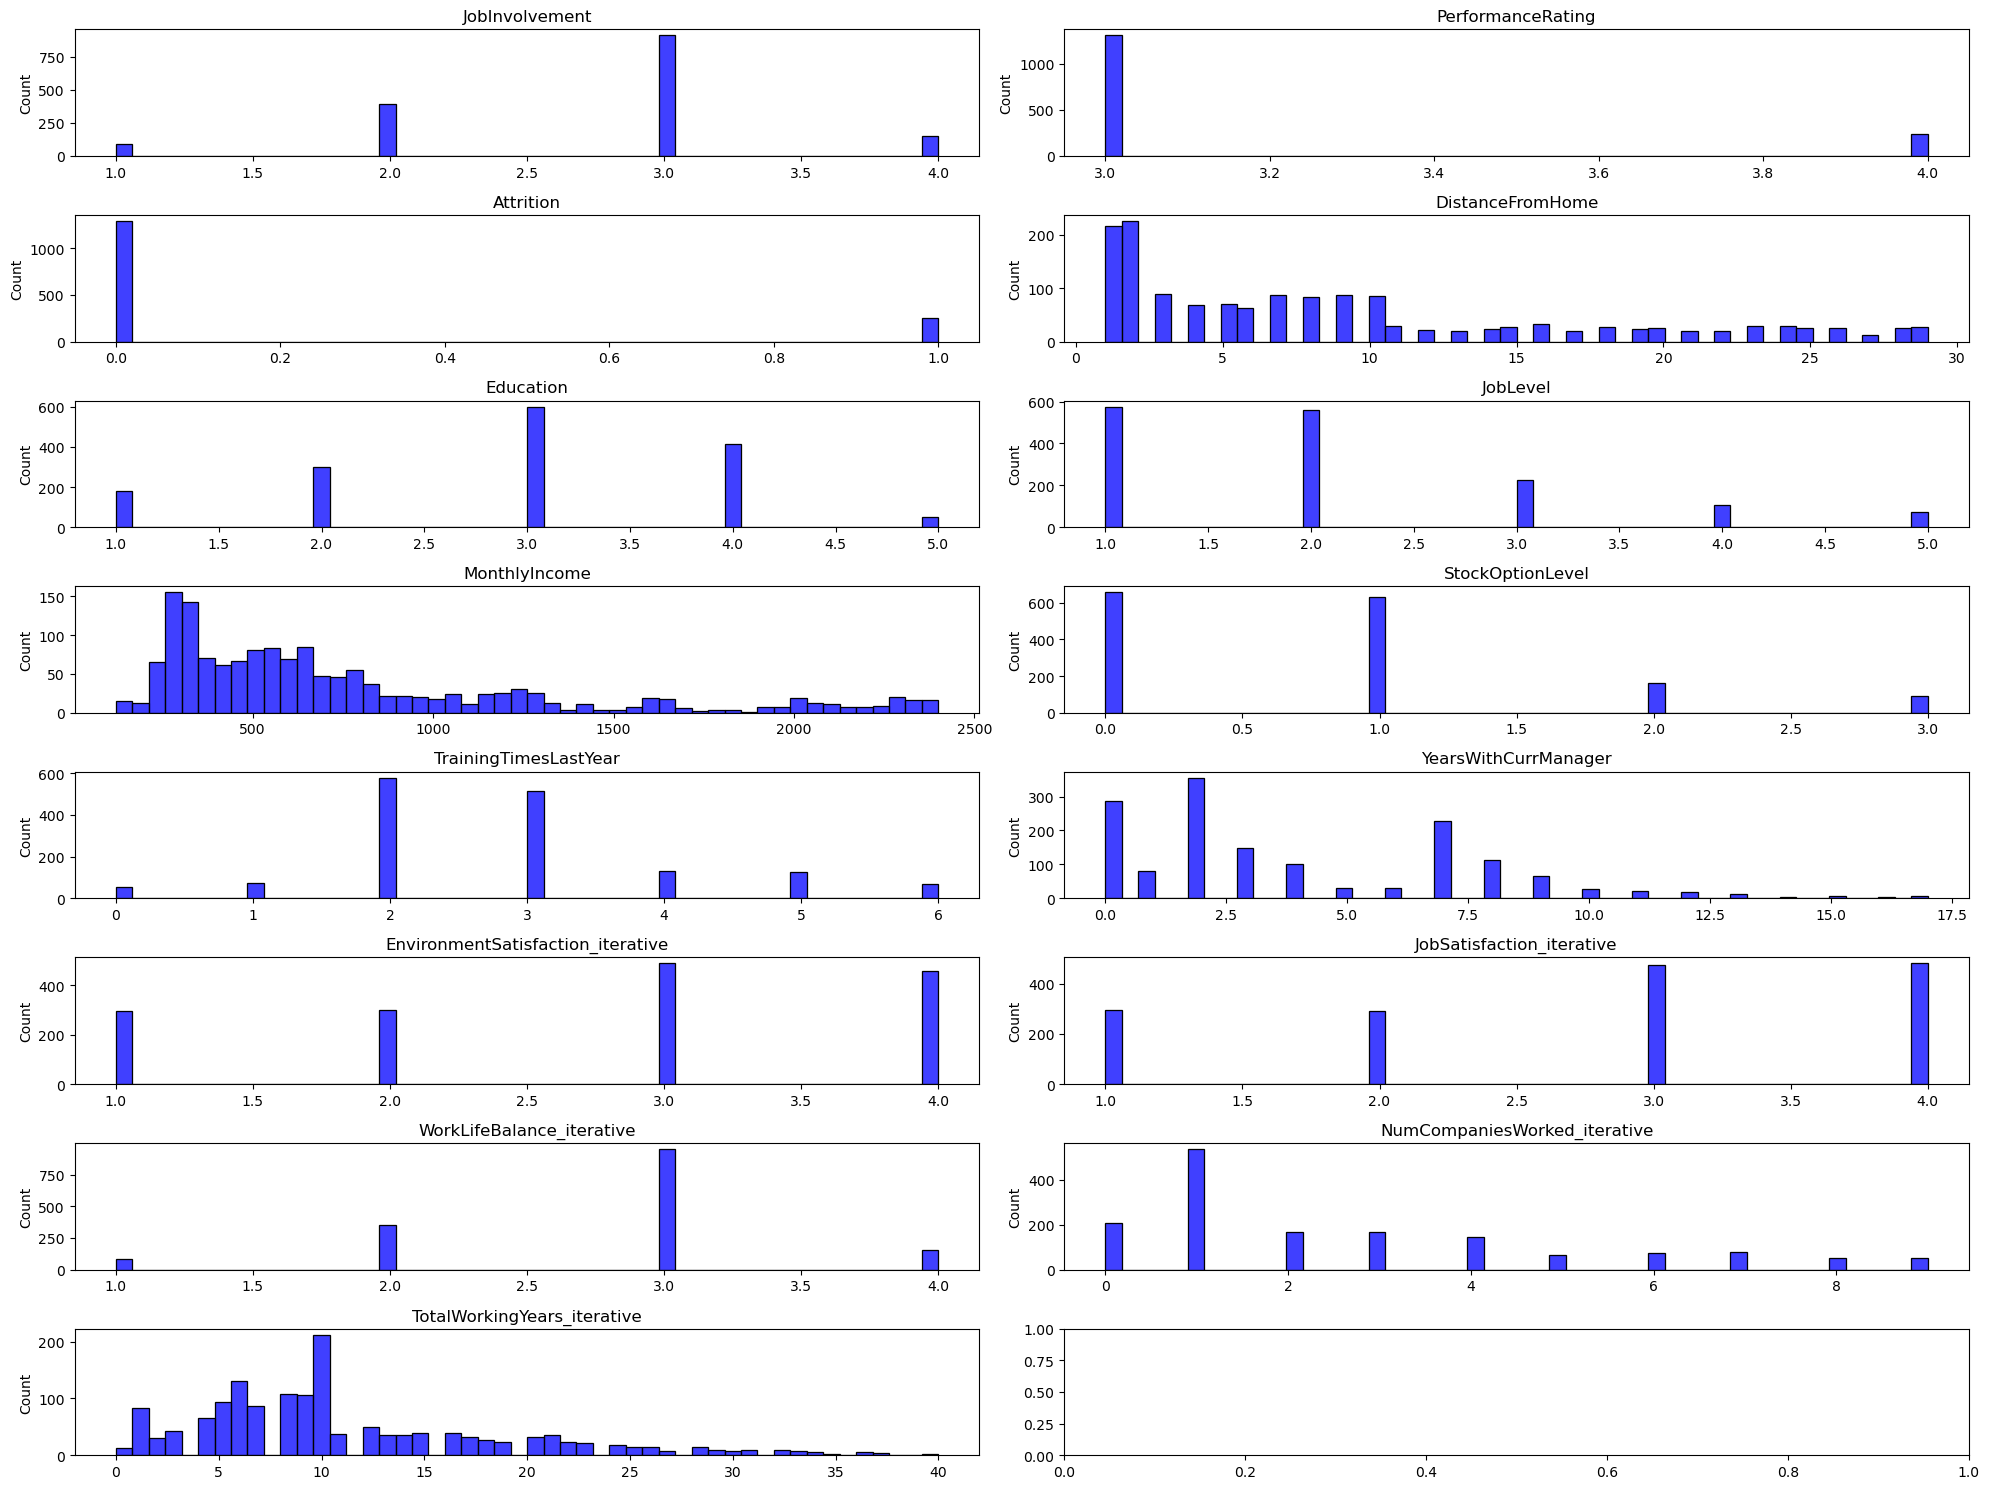

In [ ]:
univ =s_eda.GestionOutliersUnivariados(df)
univ.visualizar_outliers_univariados()


Analizamos StockOptionLevel. Es una variable categórica que sigue aportando información

In [ ]:
df["StockOptionLevel"].value_counts()

StockOptionLevel
0    658
1    631
2    165
3     89
Name: count, dtype: int64

El outlier de Performance Rating aporta información sobre los empleados. No lo tocamos

In [ ]:
df["PerformanceRating"].value_counts()

PerformanceRating
3    1308
4     235
Name: count, dtype: int64

Investigamos si el outlier de Monthly Income está correlacionado con los años en la compañía (no) y si son muchos outliers (0,9%)

In [ ]:
conteo = (df["MonthlyIncome"] > 1800).sum()
conteo/df.shape[0]

0.09008425145819832

Hemos visto que a partir de los diez años hay una caída significativa de la cantidad de empleados en la empresa, sin tener ningún tipo de relación con el salario.

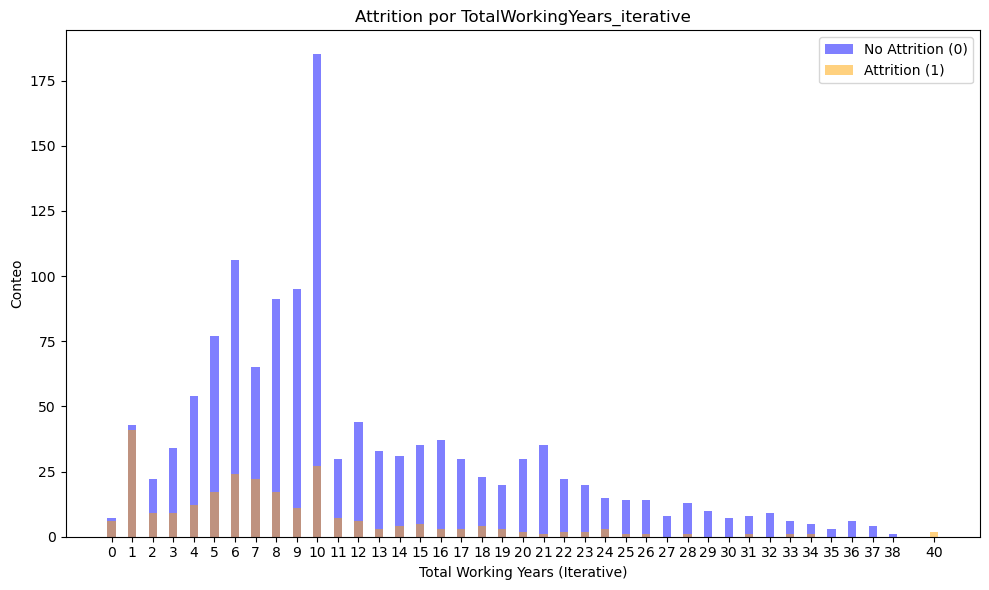

In [ ]:
# Contar ocurrencias para cada grupo
grouped = df.groupby(["TotalWorkingYears_iterative", "Attrition"]).size().unstack(fill_value=0)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Gráfico para Attrition = 0 (con transparencia)
plt.bar(
    grouped.index, 
    grouped[0], 
    width=0.4, 
    label="No Attrition (0)", 
    color="blue", 
    alpha=0.5  # Transparencia
)

# Gráfico para Attrition = 1 (con transparencia)
plt.bar(
    grouped.index, 
    grouped[1], 
    width=0.4, 
    label="Attrition (1)", 
    color="orange", 
    alpha=0.5  # Transparencia
)

# Configurar etiquetas y título
plt.title("Attrition por TotalWorkingYears_iterative")
plt.xlabel("Total Working Years (Iterative)")
plt.ylabel("Conteo")
plt.xticks(grouped.index)  # Asegurar que las etiquetas están alineadas
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
outliers_multivariados = s_eda.GestionOutliersMultivariados(df)
df_outliers_ifo = outliers_multivariados.detectar_outliers_if(contaminacion=[0.1,0.05,0.01])


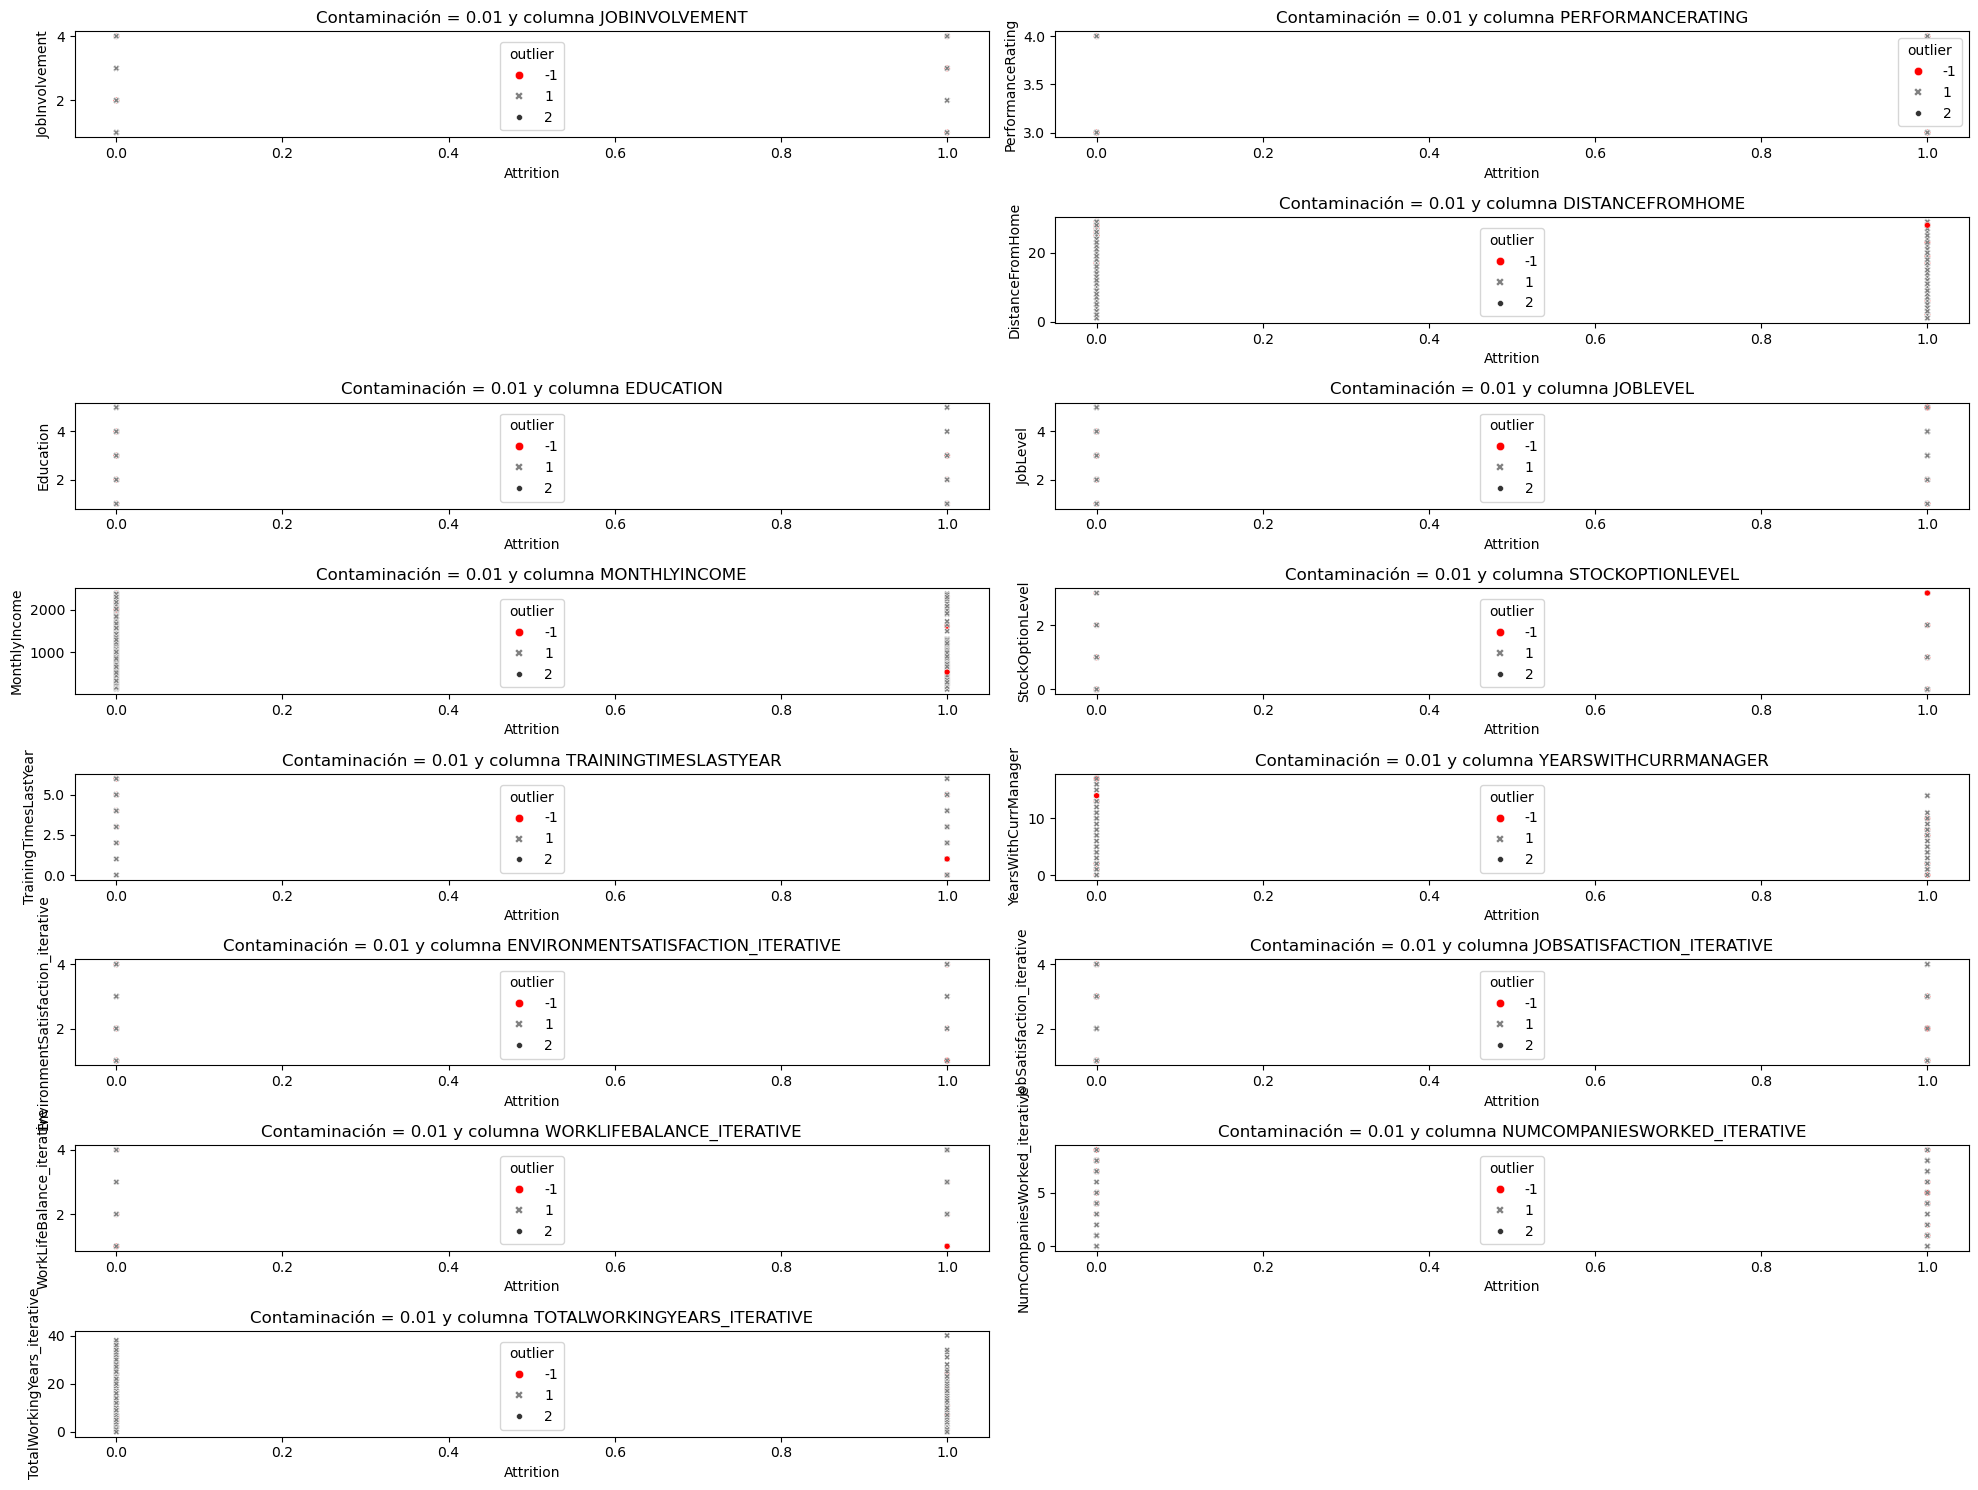

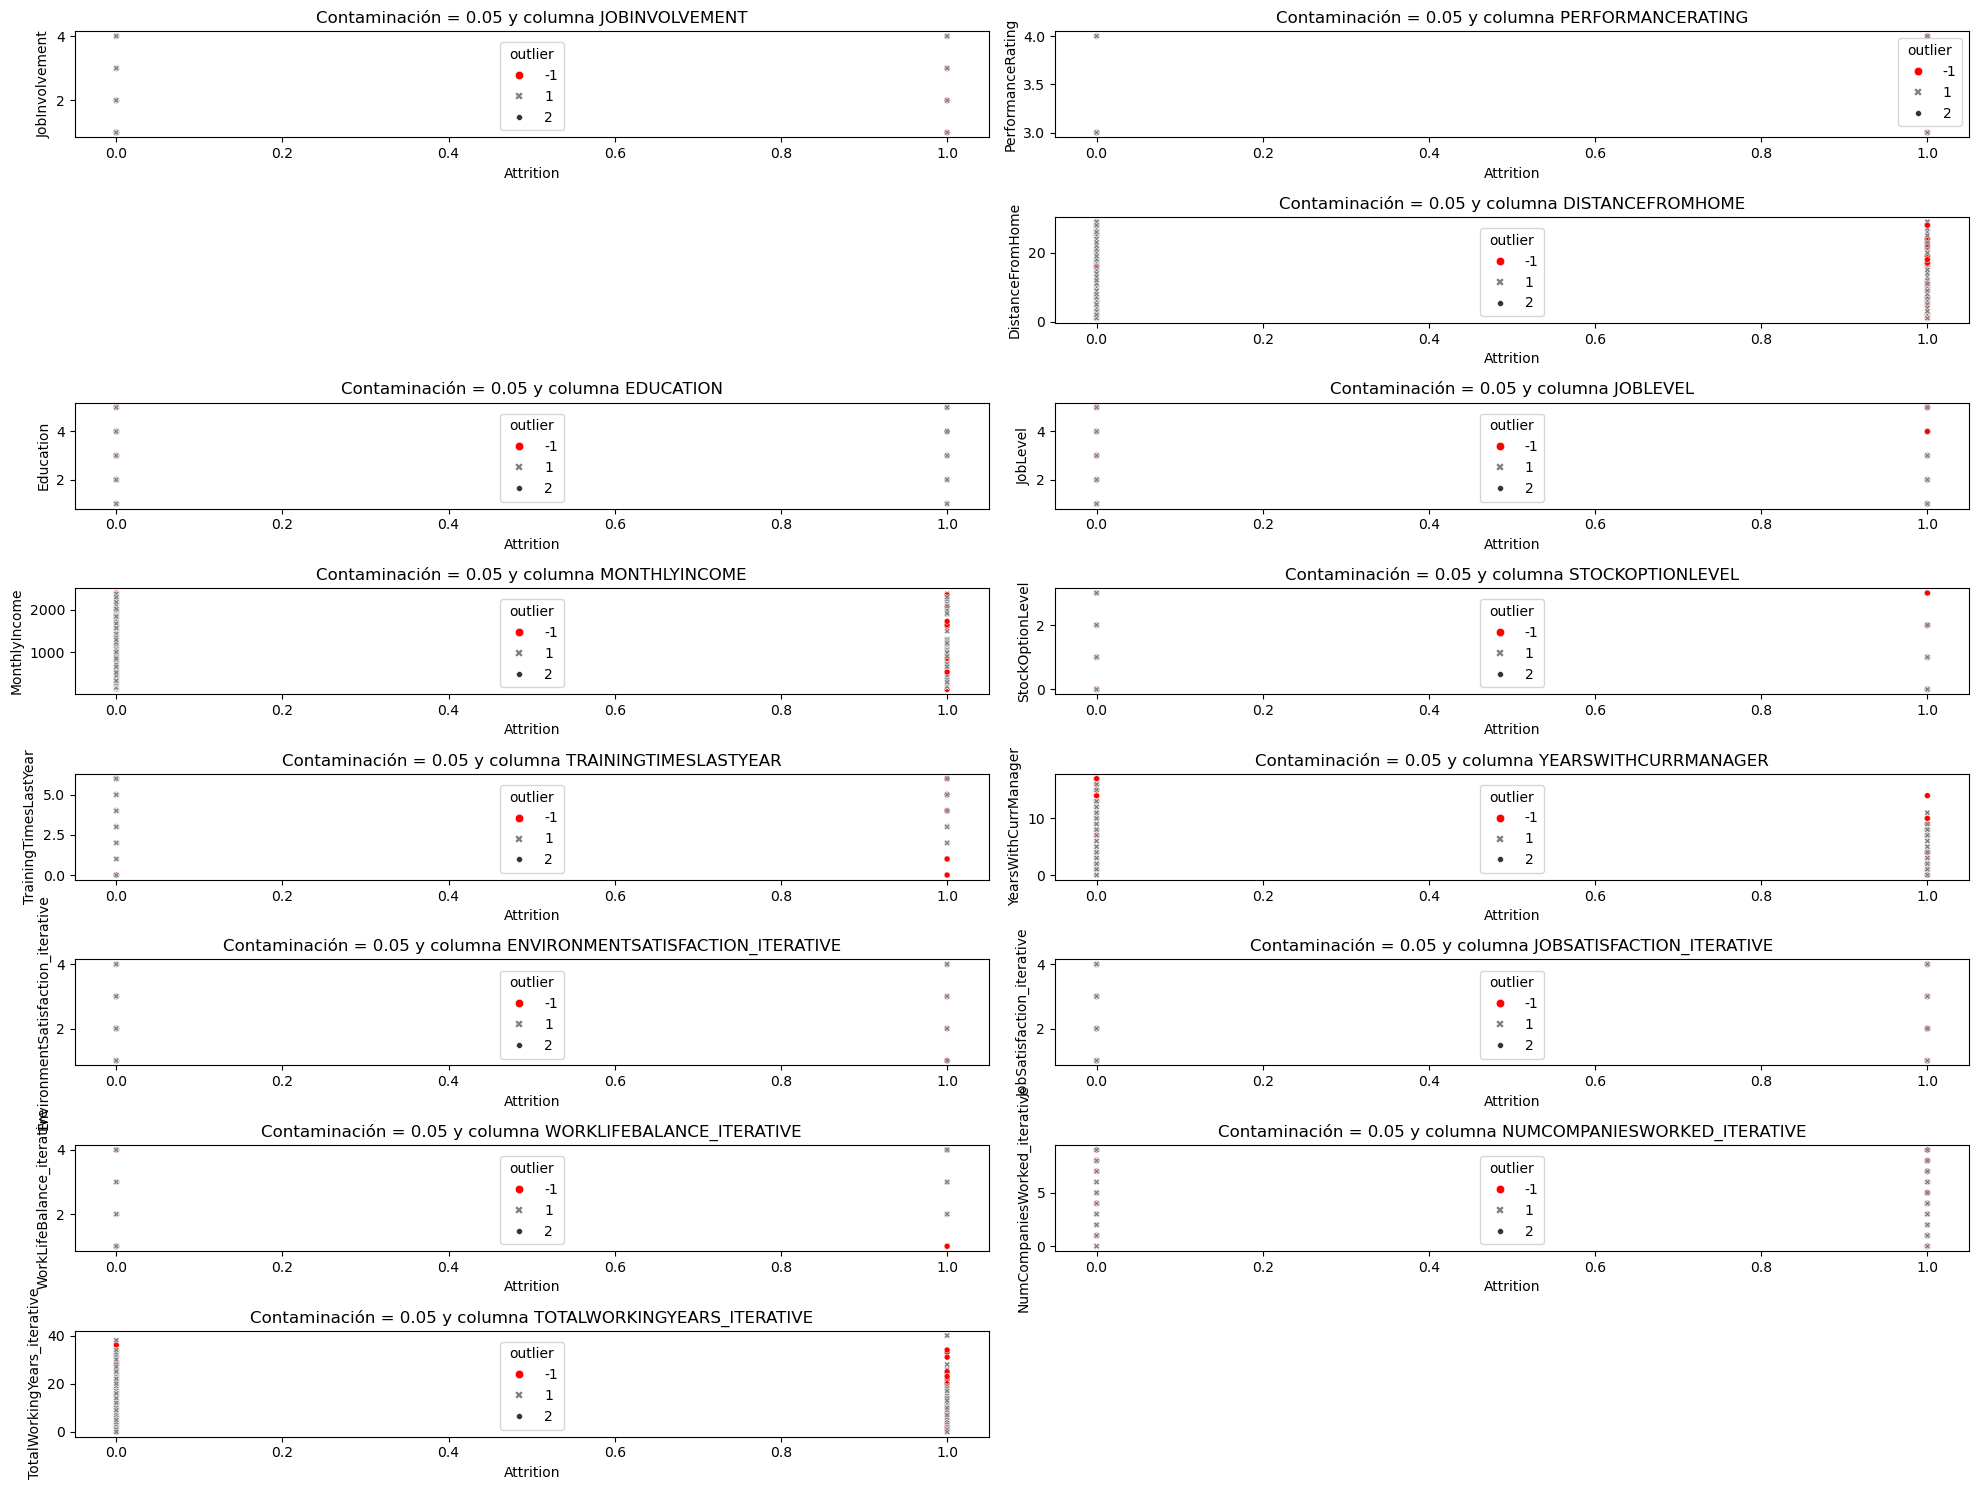

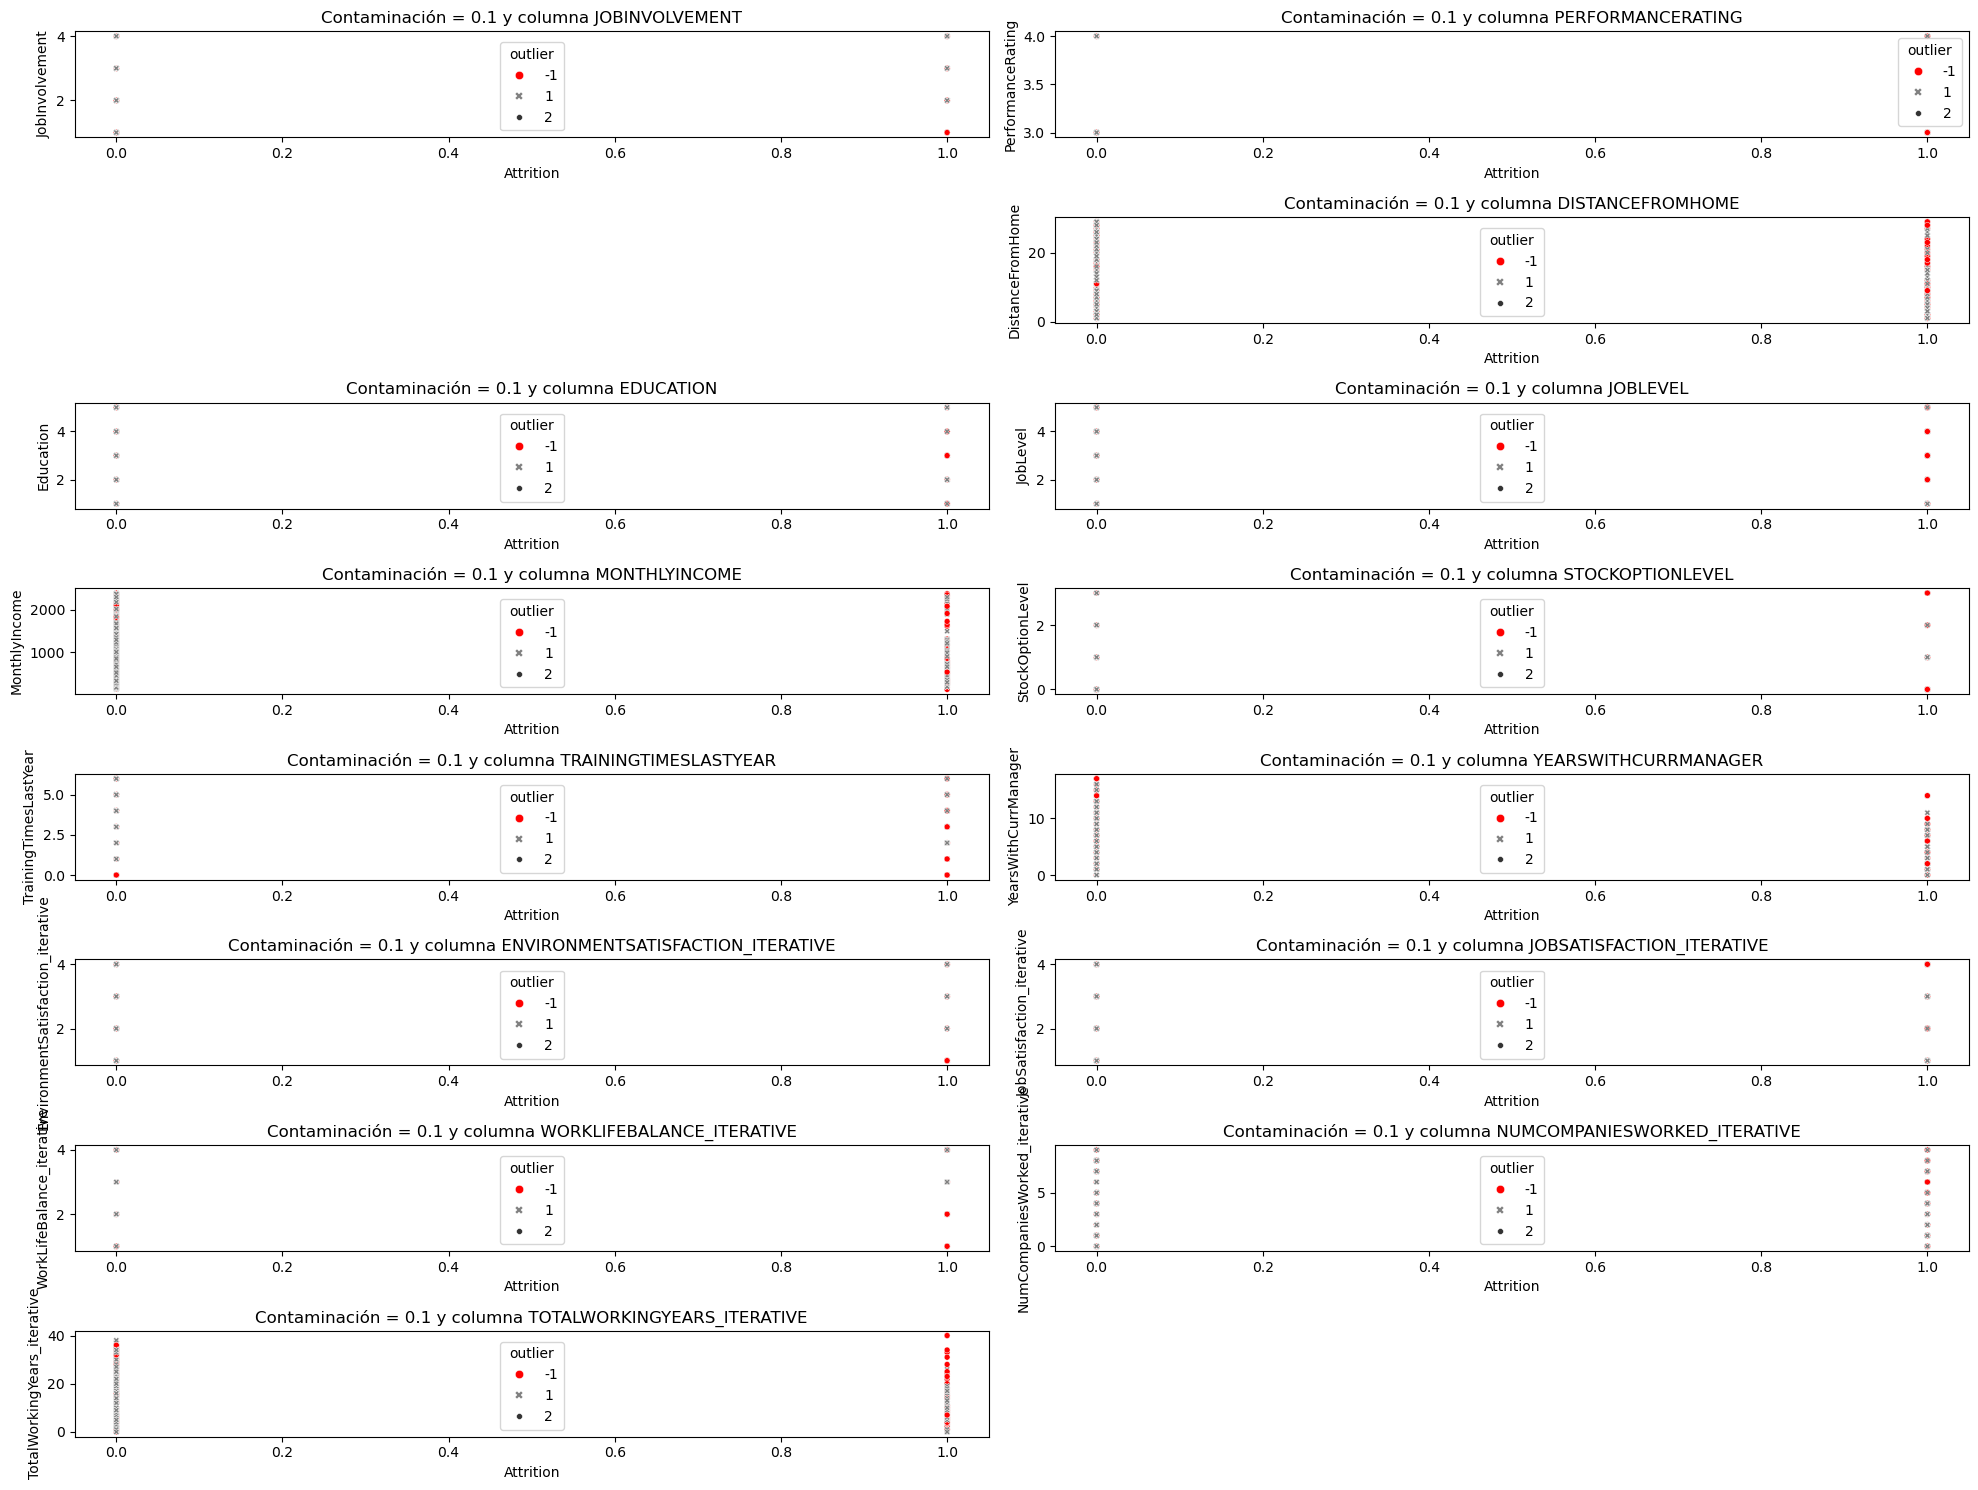

In [ ]:
outliers_multivariados.explorar_outliers_if("Attrition")

In [ ]:
df_outliers_ifo

,JobInvolvement,PerformanceRating,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,EnvironmentSatisfaction_iterative,JobSatisfaction_iterative,WorkLifeBalance_iterative,NumCompaniesWorked_iterative,TotalWorkingYears_iterative,outliers_ifo_0.1_1000,outliers_ifo_0.05_1000,outliers_ifo_0.01_1000,outliers_ifo_0.1_2000,outliers_ifo_0.05_2000,outliers_ifo_0.01_2000
0,3,3,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,1573.92,0,6,0,3,4,2,1,1,1,1,1,1,1,1
1,2,4,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,502.68,1,3,4,3,2,4,0,6,-1,-1,1,-1,-1,1
2,3,3,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,2319.36,3,2,3,2,2,1,1,5,-1,1,1,-1,1,1
3,2,3,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,998.52,3,5,5,4,4,3,3,13,1,1,1,1,1,1
4,3,3,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,281.04,2,2,4,4,1,3,4,9,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,3,3,0,Travel_Rarely,Research & Development,1,2,Medical,Female,1,Sales Executive,Divorced,849.96,1,5,0,2,3,3,2,25,1,1,1,1,1,1
4226,3,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,Married,518.40,0,2,0,2,4,3,2,5,1,1,1,1,1,1
4305,3,3,0,Travel_Rarely,Sales,1,4,Technical Degree,Male,1,Research Scientist,Divorced,309.60,3,3,15,2,2,3,8,20,1,1,1,1,1,1
4395,2,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,Divorced,326.16,1,4,7,1,4,3,2,9,1,1,1,1,1,1


In [ ]:
df_outliers_lof = outliers_multivariados.detectar_outliers_lof()

In [ ]:
df_outliers_lof

,JobInvolvement,PerformanceRating,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,EnvironmentSatisfaction_iterative,JobSatisfaction_iterative,WorkLifeBalance_iterative,NumCompaniesWorked_iterative,TotalWorkingYears_iterative,outliers_lof_0.01_10,outliers_lof_0.05_10,outliers_lof_0.1_10,outliers_lof_0.01_20,outliers_lof_0.05_20,outliers_lof_0.1_20,outliers_lof_0.01_5,outliers_lof_0.05_5,outliers_lof_0.1_5
0,3,3,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,1573.92,0,6,0,3,4,2,1,1,1,1,1,1,1,1,1,1,1
1,2,4,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,502.68,1,3,4,3,2,4,0,6,1,1,1,1,1,1,1,1,1
2,3,3,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,2319.36,3,2,3,2,2,1,1,5,1,1,1,1,1,1,1,1,1
3,2,3,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,998.52,3,5,5,4,4,3,3,13,1,1,1,1,1,1,1,1,1
4,3,3,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,281.04,2,2,4,4,1,3,4,9,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,3,3,0,Travel_Rarely,Research & Development,1,2,Medical,Female,1,Sales Executive,Divorced,849.96,1,5,0,2,3,3,2,25,1,1,1,1,1,1,1,1,1
4226,3,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,Married,518.40,0,2,0,2,4,3,2,5,1,1,1,1,1,1,1,1,1
4305,3,3,0,Travel_Rarely,Sales,1,4,Technical Degree,Male,1,Research Scientist,Divorced,309.60,3,3,15,2,2,3,8,20,1,1,-1,1,1,1,1,1,1
4395,2,3,0,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,Divorced,326.16,1,4,7,1,4,3,2,9,1,1,1,1,1,1,1,1,1


In [ ]:
prueba, df_sin_outliers = outliers_multivariados.eliminar_outliers_abs(df_outliers_ifo)
prueba

se han detectado 15 columnas con outliers absolutos


,JobInvolvement,PerformanceRating,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,EnvironmentSatisfaction_iterative,JobSatisfaction_iterative,WorkLifeBalance_iterative,NumCompaniesWorked_iterative,TotalWorkingYears_iterative,outliers_ifo_0.1_1000,outliers_ifo_0.05_1000,outliers_ifo_0.01_1000,outliers_ifo_0.1_2000,outliers_ifo_0.05_2000,outliers_ifo_0.01_2000
105,1,4,1,Travel_Rarely,Human Resources,28,2,Human Resources,Female,5,Manager,Single,667.32,1,3,0,4,3,3,1,1,-1,-1,-1,-1,-1,-1
182,4,4,1,Travel_Frequently,Sales,17,1,Marketing,Male,1,Research Director,Divorced,240.12,1,5,2,2,1,3,9,11,-1,-1,-1,-1,-1,-1
235,4,4,0,Travel_Rarely,Sales,29,4,Marketing,Male,2,Sales Executive,Single,234.12,3,4,2,1,3,4,4,10,-1,-1,-1,-1,-1,-1
286,2,4,0,Travel_Frequently,Research & Development,27,3,Life Sciences,Male,1,Research Scientist,Divorced,652.92,1,6,13,4,3,2,9,28,-1,-1,-1,-1,-1,-1
360,4,3,0,Travel_Rarely,Research & Development,17,3,Medical,Male,1,Laboratory Technician,Single,2391.12,3,5,1,1,1,2,7,6,-1,-1,-1,-1,-1,-1
521,3,4,1,Travel_Rarely,Sales,23,3,Medical,Female,2,Research Scientist,Married,2312.64,0,2,7,1,3,4,9,18,-1,-1,-1,-1,-1,-1
578,1,3,1,Travel_Rarely,Research & Development,6,3,Life Sciences,Male,1,Sales Executive,Married,269.28,3,5,10,4,1,1,1,11,-1,-1,-1,-1,-1,-1
717,4,3,1,Travel_Rarely,Research & Development,19,3,Technical Degree,Male,1,Human Resources,Single,561.60,3,0,8,1,3,2,6,24,-1,-1,-1,-1,-1,-1
799,3,3,1,Travel_Frequently,Research & Development,28,3,Medical,Female,5,Research Scientist,Single,532.08,3,1,0,1,2,1,2,7,-1,-1,-1,-1,-1,-1
820,2,3,0,Travel_Rarely,Sales,26,1,Marketing,Male,1,Sales Representative,Married,1291.32,1,5,17,4,1,4,3,24,-1,-1,-1,-1,-1,-1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JobInvolvement,1543.0,2.729099,0.712481,1.00,2.0,3.0,3.00,4.00
PerformanceRating,1543.0,3.152301,0.359429,3.00,3.0,3.0,3.00,4.00
Attrition,1543.0,0.162670,0.369184,0.00,0.0,0.0,0.00,1.00
DistanceFromHome,1543.0,9.164614,8.119255,1.00,2.0,7.0,14.00,29.00
Education,1543.0,2.908620,1.023750,1.00,2.0,3.0,4.00,5.00
JobLevel,1543.0,2.051847,1.102365,1.00,1.0,2.0,3.00,5.00
MonthlyIncome,1543.0,777.042229,563.414695,121.08,346.5,588.0,995.34,2399.88
StockOptionLevel,1543.0,0.795852,0.850228,0.00,0.0,1.0,1.00,3.00
TrainingTimesLastYear,1543.0,2.799741,1.282204,0.00,2.0,3.0,3.00,6.00
YearsWithCurrManager,1543.0,4.103694,3.582582,0.00,2.0,3.0,7.00,17.00


Vemos que los outliers son principalmente gente de 40 años para arriba, con un performance mayor a la media y con un income medio significativamente mayor, por encima del percentil 75 y con muchos años en la compañía, que llevan mucho sin ser promocionados y han trabajado muchos años. Un perfil "Senior". Lo considero útil por ahora, así que  no los vamos a eliminar

In [ ]:
prueba.describe().T

,count,mean,std,min,25%,50%,75%,max
JobInvolvement,15.0,3.000000,1.133893,1.00,2.00,3.00,4.00,4.00
PerformanceRating,15.0,3.600000,0.507093,3.00,3.00,4.00,4.00,4.00
Attrition,15.0,0.533333,0.516398,0.00,0.00,1.00,1.00,1.00
DistanceFromHome,15.0,21.333333,8.355209,2.00,17.00,25.00,28.00,29.00
Education,15.0,2.333333,0.975900,1.00,1.50,3.00,3.00,4.00
JobLevel,15.0,2.200000,1.612452,1.00,1.00,1.00,3.00,5.00
MonthlyIncome,15.0,1112.952000,799.535416,234.12,532.08,667.32,1812.18,2391.12
StockOptionLevel,15.0,1.866667,1.125463,0.00,1.00,2.00,3.00,3.00
TrainingTimesLastYear,15.0,3.133333,1.807392,0.00,2.00,3.00,5.00,6.00
YearsWithCurrManager,15.0,5.666667,5.677860,0.00,1.50,2.00,9.00,17.00


# ENCODING

Vamos a continuar trabajando con el df, pues no vamos a eliminar outliers. Usaremos un estandarizado estándar para mantener el efecto de los outliers

In [ ]:
sep = s_eda.Visualizador(df)
df_num,df_cat = sep.separar_dataframes()

In [ ]:
vis = s_eda.Visualizador(df)
df_num, df_cat = vis.separar_dataframes()

lista_cats = df_cat.columns
tests = s_encoding.TestEstadisticos(df,"Attrition",lista_cats)
dic = tests.detectar_orden_binaria()

Esta es la tabla de contingencia para BusinessTravel, con la variable respuesta Attrition
Attrition            0    1
BusinessTravel             
Non-Travel         144   12
Travel_Frequently  217   76
Travel_Rarely      931  163
La variable categórica TIENE ORDEN
-----
Esta es la tabla de contingencia para Department, con la variable respuesta Attrition
Attrition                 0    1
Department                      
Human Resources          44   21
Research & Development  852  160
Sales                   396   70
La variable categórica TIENE ORDEN
-----
Esta es la tabla de contingencia para EducationField, con la variable respuesta Attrition
Attrition           0    1
EducationField            
Human Resources    16   12
Life Sciences     534  107
Marketing         137   26
Medical           401   81
Other              79   10
Technical Degree  125   15
La variable categórica TIENE ORDEN
-----
Esta es la tabla de contingencia para Gender, con la variable respuesta Attrition
Attritio

In [ ]:
columnas_sin_orden = [col for col, orden in dic.items() if orden == 0]
columnas_con_orden = [col for col, orden in dic.items() if orden == 1]
dic_encoding = {"onehot":columnas_sin_orden,
              "target":columnas_con_orden}

In [ ]:
dic_encoding

{'onehot': ['Gender', 'JobRole'],
 'target': ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']}

In [ ]:
encoding = s_encoding.Encoding(df,dic_encoding,"Attrition")
df_enco = encoding.one_hot_encoding()
encoding = s_encoding.Encoding(df_enco,dic_encoding,"Attrition")
df_enco = encoding.target_encoding()
df_enco.reset_index(drop=True)
df_enco.drop(columns = dic_encoding["onehot"],inplace= True)

Establecemos las columnas sin la variable respuesta para estandarizar. También hemos eliminado "Gender Female" por ser redundante

In [ ]:
cols = ['JobInvolvement', 'PerformanceRating', 'BusinessTravel',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsWithCurrManager', "Gender_Female",
       'EnvironmentSatisfaction_iterative', 'JobSatisfaction_iterative',
       'WorkLifeBalance_iterative', 'NumCompaniesWorked_iterative',
       'TotalWorkingYears_iterative', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']

# ESTANDARIZACIÓN

In [ ]:
#Standard
escalador_standard = StandardScaler()

for columna in cols:
    datos_transf_stand = escalador_standard.fit_transform(df_enco[[columna]])  
    df_enco[f"{columna}_stand"] = datos_transf_stand

df_enco.drop(columns= cols,inplace= True)

KeyError: "None of [Index(['Gender_FemaleEnvironmentSatisfaction_iterative'], dtype='object')] are in the [columns]"

In [ ]:
df_cat.columns 

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [ ]:
df_enco.to_pickle("../datos_dfs/pickle1_stand.pkl")